In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
buoy = 248
# pac_data_fn = 'data/SWFPAC_open_waters_buoy46088_mWH&seastate_2004_2019.csv'
pac_data_fn = 'data/SWFPAC_open_waters_buoy{}_mWH&seastate_2020.csv'.format(buoy)
df = pd.read_csv(pac_data_fn,index_col='date_time')
df.index = pd.to_datetime(df.index)

In [4]:
df.describe()

,wave_height_(m),sea_state
count,189.000000,189.000000
mean,0.990582,3.137566
std,0.459364,0.603286
min,0.190000,2.000000
25%,0.660000,3.000000
50%,0.940000,3.000000
75%,1.240000,3.000000
max,2.600000,5.000000


In [5]:
df['Month'] = df.index.month_name().str.slice(0,3)
df

,wave_height_(m),sea_state,Month
date_time,,,
2020-04-01,0.63,3,Apr
2020-04-02,0.67,3,Apr
2020-04-03,1.65,4,Apr
2020-04-04,1.51,4,Apr
2020-04-05,0.48,2,Apr
...,...,...,...
2020-10-02,0.87,3,Oct
2020-10-03,0.78,3,Oct
2020-10-04,0.67,3,Oct


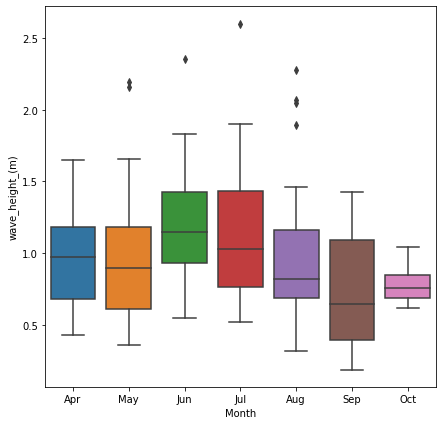

In [6]:
box_whisker_fn = "figures/SWFPAC_buoy{}_wave_height.png".format(buoy)
y = "wave_height_(m)"
x = "Month"
plt.figure(figsize=(7,7,))
ax = sns.boxplot(x=x, y=y, data=df)
# ax = sns.swarmplot(x=x, y=y, data=df, color='grey') 
plt.savefig(box_whisker_fn, dpi=600)